### Lamin

In [84]:
library(rio)
source('./ABCA7lof2/plotting.r')
library(ggplot2)
library(outliers)
library(ggforce)


In [86]:
data <- import_list('./raw_data/experimental/LaminAC_shape_measure.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_lam', 'intden_lam','count', 'perc_area', 'mean', 'intden', 'circ') 
                      
out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Circ') | startsWith(x, 'IntDen')| startsWith(x, 'Count')| startsWith(x, '%')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$apoe_genotype = summary[full_data$projid,'apoe_genotype']

full_data$intden = as.numeric(full_data$intden)
full_data$circ = as.numeric(full_data$circ)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `` -> `...3`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntD

null device 
          1

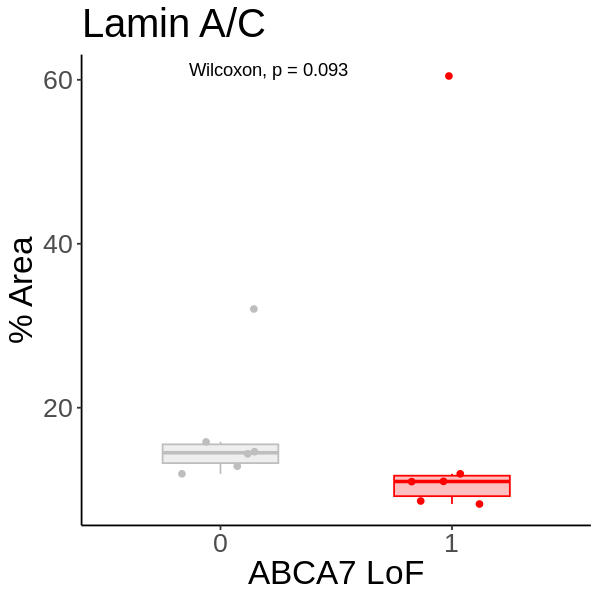

In [87]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$perc_area, by=list(temp$projid, temp$LOF), 'mean')

# T = dixon.test(temp$x)
# if(T$p.value<0.05){
#     keep = which(temp$x!=max(temp$x))
# }

# T = dixon.test(temp$x, opposite=TRUE)
# if(T$p.value<0.05){
#     keep2 = which(temp$x!=min(temp$x))
# }else{
#     keep2 = keep
# }

# print(keep_all)
# keep_all = intersect(keep, keep2)

options(repr.plot.width=5, repr.plot.height=5)

p = ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') 

p
# pdf('./pdf_figures/lamin_area.pdf', width=5, height=5)
# p 

dev.off()

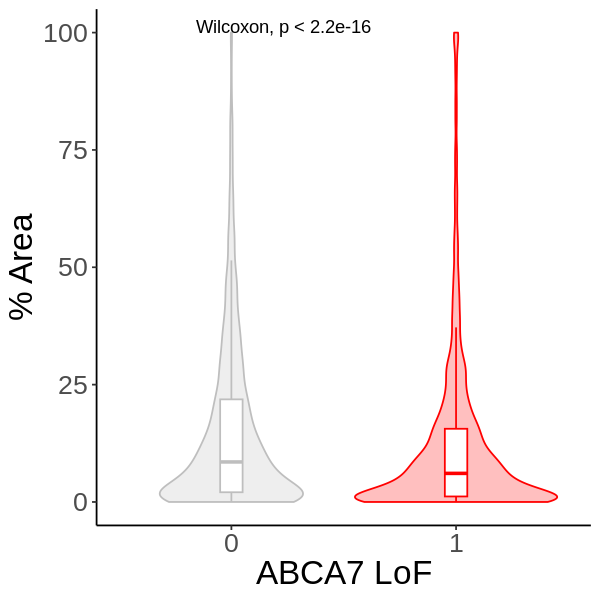

In [88]:
p = ggplot(full_data, aes(x = factor(LOF), y = (perc_area),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('% Area') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)
p
# pdf('./pdf_figures/lamin_area_by_cell.pdf', width=5, height=5)
# p 

# dev.off()

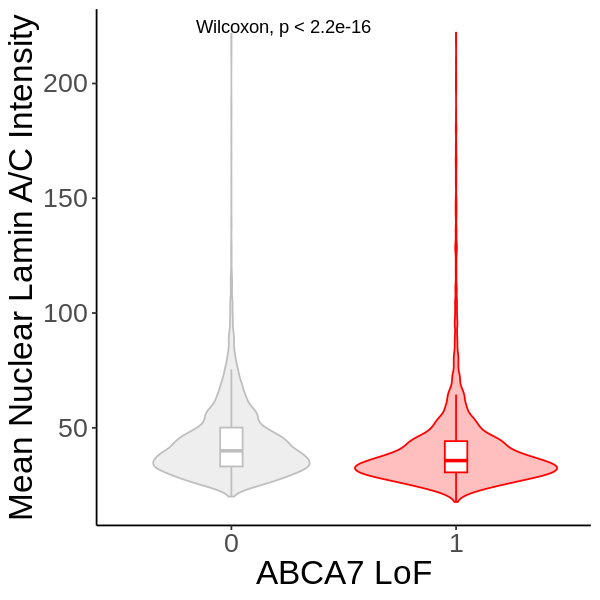

In [89]:
p = ggplot(full_data, aes(x = factor(LOF), y = (mean_lam),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('Mean Nuclear Lamin A/C Intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)
p
# pdf('./pdf_figures/lamin_intensity_by_cell.pdf', width=5, height=5)
# p 

# dev.off()

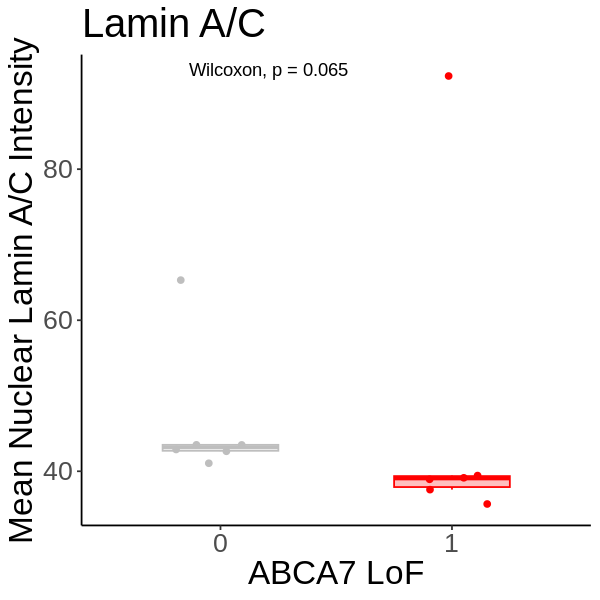

In [90]:

temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_lam, by=list(temp$projid, temp$LOF), 'mean')

# T = dixon.test(temp$x)
# if(T$p.value<0.05){
#     keep = which(temp$x!=max(temp$x))
# }

# T = dixon.test(temp$x, opposite=TRUE)
# if(T$p.value<0.05){
#     keep2 = which(temp$x!=min(temp$x))
# }else{
#     keep2 = keep
# }

# keep_all = intersect(keep, keep2)
# print(keep_all)
options(repr.plot.width=5, repr.plot.height=5)

p = ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('Mean Nuclear Lamin A/C Intensity') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('Lamin A/C') 
p
# pdf('./pdf_figures/lamin_mean.pdf', width=5, height=5)
# p
# dev.off()

In [91]:
table(full_data$LOF)


   0    1 
3887 3904 

## TOM20

In [92]:
library(rio)
source('./ABCA7lof2/plotting.r')

In [93]:
data <- import_list('./raw_data/experimental/Tomm20count_NeuNROI.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('mean_neun', 'intden_neun', 'mean_dapi', 'intden_dapi', 'mean_tom', 'intden_tom', 'count', 'av_size', 'perc_area', 'mean', 'intden')                       

                      out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Average') | startsWith(x, 'IntDen') | startsWith(x, 'Count') |startsWith(x, '%')))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]
    out[[i]] = x
                               
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$apoe_genotype = summary[full_data$projid,'apoe_genotype']

full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
full_data = full_data[full_data$mean_neun>0 & full_data$mean_dapi>0,]

New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDen` -> `IntDen...25`
New names:
• `` -> `...1`
• `Label` -> `Label...2`
• `Area` -> `Area...3`
• `Mean` -> `Mean...4`
• `IntDen` -> `IntDen...5`
• `RawIntDen` -> `RawIntDen...6`
• `` -> `...7`
• `Label` -> `Label...8`
• `Area` -> `Area...9`
• `Mean` -> `Mean...10`
• `IntDen` -> `IntDen...11`
• `RawIntDen` -> `RawIntDen...12`
• `` -> `...13`
• `Label` -> `Label...14`
• `Area` -> `Area...15`
• `Mean` -> `Mean...16`
• `IntDen` -> `IntDen...17`
• `RawIntDen` -> `RawIntDen...18`
• `Mean` -> `Mean...24`
• `IntDe

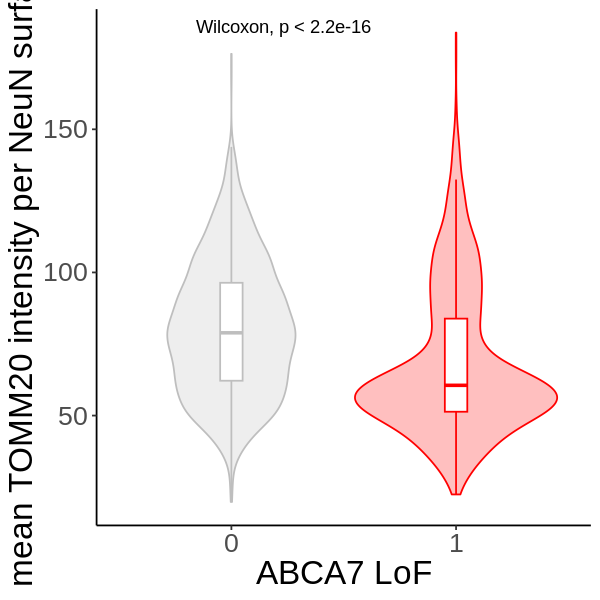

In [94]:
options(repr.plot.width=5, repr.plot.height=5)

p = ggplot(full_data, aes(x = factor(LOF), y = (mean_tom),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('mean TOMM20 intensity per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)
p
# pdf('./pdf_figures/tomm_mean_percell.pdf', width=5, height=5)
# p
# dev.off()

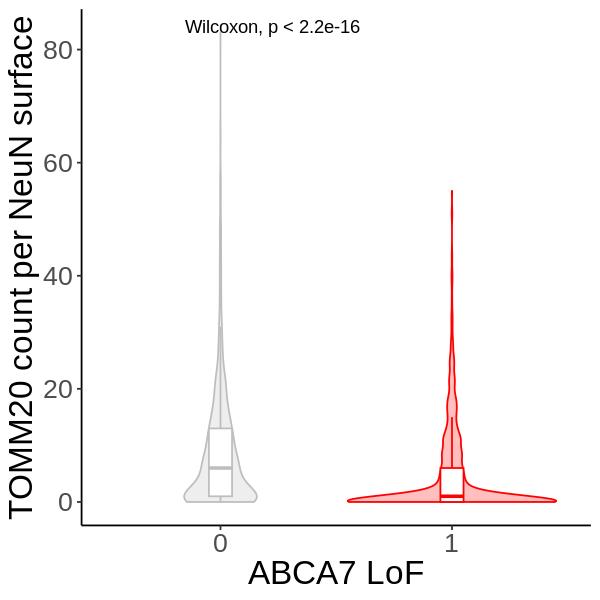

In [95]:
options(repr.plot.width=5, repr.plot.height=5)

p = ggplot(full_data, aes(x = factor(LOF), y = (count),
          fill = factor(LOF) ))+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red')) + ylab('TOMM20 count per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)

p
# pdf('./pdf_figures/tomm_counts_per_cell.pdf', width=5, height=5)
# p
# dev.off()

In [96]:
table(full_data$LOF)


   0    1 
1571 1238 

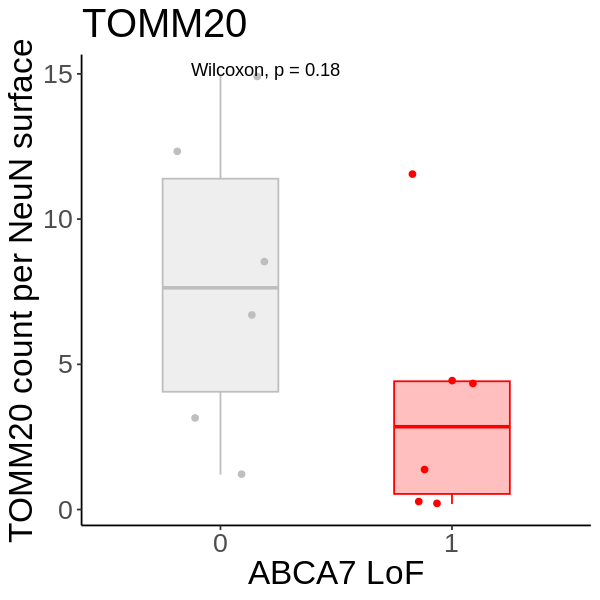

In [97]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$count, by=list(temp$projid, temp$LOF), 'mean')

# T = dixon.test(temp$x)
# if(T$p.value<0.05){
#     keep = which(temp$x!=max(temp$x))
# }else{
#     keep = 1:nrow(temp)
# }
# T = dixon.test(temp$x, opposite=TRUE)
# if(T$p.value<0.05){
#     keep2 = which(temp$x!=min(temp$x))
# }else{
#     keep2 = keep
# }

# keep_all = intersect(keep, keep2)
# print(keep_all)

options(repr.plot.width=5, repr.plot.height=5)
p = ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('TOMM20 count per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('TOMM20') 

p
# pdf('./pdf_figures/tom_counts_per_ind.pdf', width=5, height=5)

# p
# dev.off()

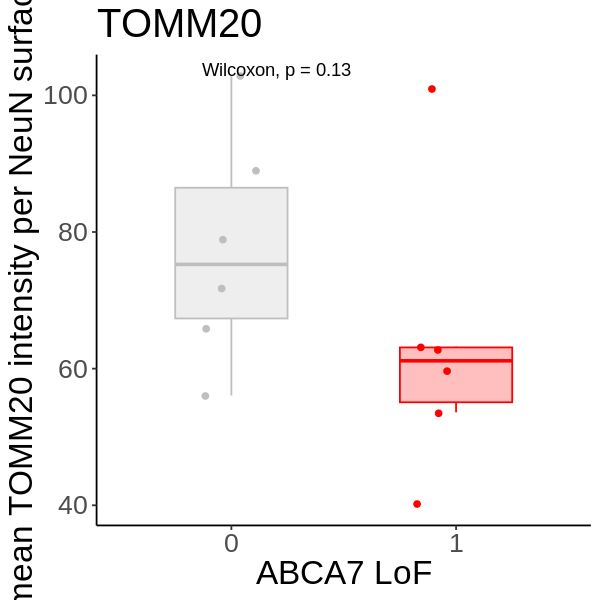

In [98]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_tom, by=list(temp$projid, temp$LOF), 'mean')

# T = dixon.test(temp$x)
# if(T$p.value<0.05){
#     keep = which(temp$x!=max(temp$x))
# }else{
#     keep = 1:nrow(temp)
# }

# T = dixon.test(temp$x, opposite=TRUE)
# if(T$p.value<0.05){
#     keep2 = which(temp$x!=min(temp$x))
# }else{
#     keep2 = keep
# }

# keep_all = intersect(keep, keep2)

# print(keep_all)

options(repr.plot.width=5, repr.plot.height=5)
p = ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean TOMM20 intensity per NeuN surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('TOMM20')

p
# pdf('./pdf_figures/tomm_mean_per_ind.pdf', width=5, height=5)

# p
# dev.off()

### srebp

In [105]:
data <- import_list('./raw_data/experimental/SREBP2_DAPIROIs.xlsx')
data = data[2:length(data)]
names = unlist(lapply(strsplit(names(data), '_'), function(x) x[[1]]))
N = c('area_neun', 'mean_neun', 'intden_neun', 'area_dapi', 'mean_dapi', 'intden_dapi', 'area_rage', 'mean_rage', 'intden_rage', 'area_sreb', 'mean_sreb', 'intden_sreb')                       

out = list()
for(i in 1:length(data)){
    cols_index = unlist(lapply(names(data[[i]]), function(x)  startsWith(x, 'Mean') | startsWith(x, 'Area') | startsWith(x, 'IntDen') ))
    x = data[[i]][,cols_index]
    colnames(x) = N
    x$projid = names[i]

    out[[i]] = x
}
                               
full_data = do.call('rbind', out)
                               
full_data['projid'][full_data['projid']=='5018174'] = '50108174'
full_data['projid'][full_data['projid']=='46246602'] = '46246604'
                               
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
summary = read.csv('./raw_data/metadata/single_cell_individual_metadata.csv')
rownames(summary) = summary$projid
full_data$LOF = summary[full_data$projid,'ABCA7LoF']
full_data$intden = as.numeric(full_data$intden)
full_data$av_size = as.numeric(full_data$av_size)
full_data$mean = as.numeric(full_data$mean)
full_data[is.na(full_data)]=0
                               
full_data = full_data[full_data$mean_neun>40 & full_data$mean_dapi>0 & full_data$area_neun<70,]

New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `` -> `...6`
• `Area` -> `Area...7`
• `Mean` -> `Mean...8`
• `IntDen` -> `IntDen...9`
• `RawIntDen` -> `RawIntDen...10`
• `` -> `...11`
• `Area` -> `Area...12`
• `Mean` -> `Mean...13`
• `IntDen` -> `IntDen...14`
• `RawIntDen` -> `RawIntDen...15`
• `` -> `...16`
• `Area` -> `Area...17`
• `Mean` -> `Mean...18`
• `IntDen` -> `IntDen...19`
• `RawIntDen` -> `RawIntDen...20`
New names:
• `` -> `...1`
• `Area` -> `Area...2`
• `Mean` -> `Mean...3`
• `IntDen` -> `IntDen...4`
• `RawIntDen` -> `RawIntDen...5`
• `` -> `...6`
• `Area` -> `Area...7`
• `Mean` -> `Mean...8`
• `IntDen` -> `IntDen...9`
• `RawIntDen` -> `RawIntDen...10`
• `` -> `...11`
• `Area` -> `Area...12`
• `Mean` -> `Mean...13`
• `IntDen` -> `IntDen...14`
• `RawIntDen` -> `RawIntDen...15`
• `` -> `...16`
• `Area` -> `Area...17`
• `Mean` -> `Mean...18`
• `IntDen` -> `IntDen...19`
• `RawIntDen` -> `RawI

ERROR: Error in `$<-.data.frame`(`*tmp*`, intden, value = numeric(0)): replacement has 0 rows, data has 6403


In [106]:
table(full_data$LOF)


   0    1 
3447 2956 

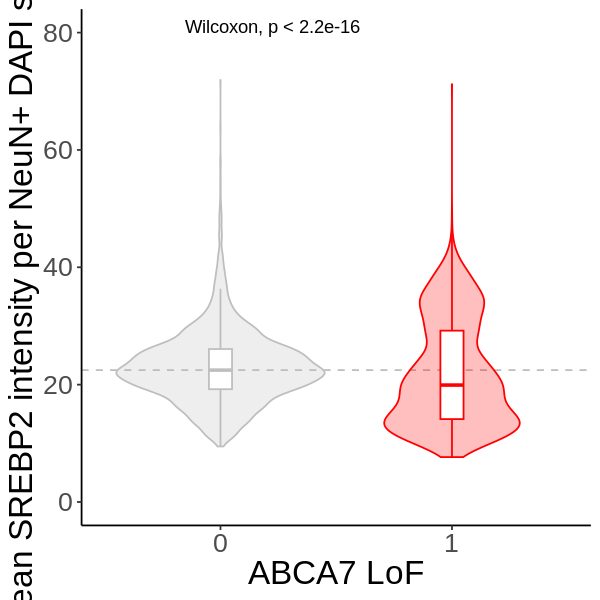

In [107]:
options(repr.plot.width=5, repr.plot.height=5)
M1 = median(full_data$mean_sreb[full_data$LOF==1])
M2 = median(full_data$mean_sreb[full_data$LOF==0])

p = ggplot(full_data, aes(x = factor(LOF), y = (mean_sreb),
          fill = factor(LOF) ))+ geom_hline(yintercept=M2, color='grey',  linetype='dashed')+ geom_violin(alpha=0.25,aes(color=factor(LOF)))+geom_boxplot(width=.1, outlier.alpha=0, fill='white', aes(color=factor(LOF)))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + ylim(0,80)+ scale_color_manual(values=c('grey', 'red')) + ylab('mean SREBP2 intensity per NeuN+ DAPI surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))   #+ geom_jitter()#+ylim(0,1)
p 
# pdf('./pdf_figures/srebp_mean_per_cell.pdf', width=5, height=7)
# p
# dev.off()

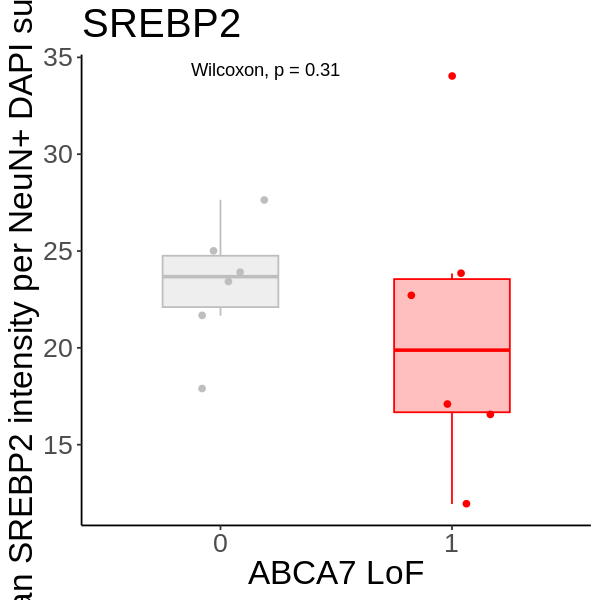

In [108]:
temp = full_data#[full_data$count>0,]
temp = aggregate(temp$mean_sreb, by=list(temp$projid, temp$LOF), 'mean')

# T = dixon.test(temp$x)
# if(T$p.value<0.05){
#     keep = which(temp$x!=max(temp$x))
# }else{
#     keep = 1:nrow(temp)
# }

# T = dixon.test(temp$x, opposite=TRUE)
# if(T$p.value<0.05){
#     keep2 = which(temp$x!=min(temp$x))
# }else{
#     keep2 = keep
# }

# keep_all = intersect(keep, keep2)

# print(keep_all)

options(repr.plot.width=5, repr.plot.height=5)
p = ggplot(temp, aes(x = factor(Group.2), y = (x),
          fill = factor(Group.2) ))+geom_boxplot(width=.5, outlier.alpha=0, alpha=0.25,aes(fill = factor(Group.2),color=factor(Group.2)))+geom_jitter(aes(fill = factor(Group.2),color=factor(Group.2)), position = position_jitter(width = .2))+ggpubr::stat_compare_means(method = 'wilcox') + theme_classic() + scale_fill_manual(values=c('grey', 'red')) + scale_color_manual(values=c('grey', 'red'))+ ylab('mean SREBP2 intensity per NeuN+ DAPI surface') + xlab('ABCA7 LoF')+ theme(legend.position = "none")+ theme(text = element_text(size = 20))+ggtitle('SREBP2')

p
# pdf('./pdf_figures/srebp_mean_per_ind.pdf', width=5, height=5)

# p
# dev.off()